[View in Colaboratory](https://colab.research.google.com/github/shahparth06/Machine-Learning-Playground/blob/master/cifar10_cnn.ipynb)

In [0]:
import numpy as np
import pandas as pd

from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam,RMSprop
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.metrics import confusion_matrix

In [0]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [67]:
print("x_train shape: ",x_train.shape)
print("y_train shape: ",y_train.shape)
print("x_test shape: ",x_test.shape)
print("y_test shape: ",y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


[9]


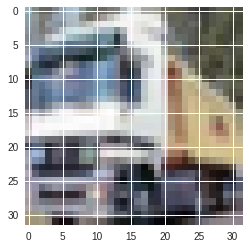

In [68]:
plt.imshow(x_train[1])
print(y_train[1])

In [0]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [0]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes=10)

In [0]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 256, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))


model.add(Flatten())
model.add(Dense(1024,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [80]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 32, 32, 64)        4864      
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 32, 32, 64)        102464    
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 16, 16, 128)       73856     
__________

In [0]:
opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(optimizer=opt,loss="categorical_crossentropy",metrics=["accuracy"])

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
epochs=40
batch_size=64

In [84]:
history = model.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test,y_test),
                    callbacks=[learning_rate_reduction])

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
44032/50000 [=========================>....] - ETA: 7s - loss: 1.9253 - acc: 0.3005

50000/50000 [==============================] - 67s 1ms/step - loss: 1.8912 - acc: 0.3128 - val_loss: 2.3886 - val_acc: 0.2703
Epoch 2/40
26624/50000 [==============>...............] - ETA: 27s - loss: 1.5179 - acc: 0.4531

50000/50000 [==============================] - 63s 1ms/step - loss: 1.4452 - acc: 0.4844 - val_loss: 1.4267 - val_acc: 0.4830
Epoch 3/40
20032/50000 [===========>..................] - ETA: 35s - loss: 1.2496 - acc: 0.5611

50000/50000 [==============================] - 63s 1ms/step - loss: 1.1903 - acc: 0.5867 - val_loss: 1.0000 - val_acc: 0.6587
Epoch 4/40
17536/50000 [=========>....................] - ETA: 38s - loss: 1.0886 - acc: 0.6343

50000/50000 [==============================] - 64s 1ms/step - loss: 1.0486 - acc: 0.6502 - val_loss: 1.0411 - val_acc: 0.6500
Epoch 5/40
16576/50000 [========>.....................] - ETA: 40s - loss: 0.9584 - acc: 0.6767

50000/50000 [==============================] - 63s 1ms/step - loss: 0.9343 - acc: 0.6864 - val_loss: 0.8287 - val_acc: 0.7191
Epoch 6/40
16192/50000 [========>.....................] - ETA: 40s - loss: 0.8523 - acc: 0.7157

50000/50000 [==============================] - 64s 1ms/step - loss: 0.8643 - acc: 0.7132 - val_loss: 0.7474 - val_acc: 0.7512
Epoch 7/40
16064/50000 [========>.....................] - ETA: 40s - loss: 0.7979 - acc: 0.7336

50000/50000 [==============================] - 64s 1ms/step - loss: 0.7946 - acc: 0.7396 - val_loss: 0.7917 - val_acc: 0.7378
Epoch 8/40
16000/50000 [========>.....................] - ETA: 41s - loss: 0.7487 - acc: 0.7564

50000/50000 [==============================] - 64s 1ms/step - loss: 0.7428 - acc: 0.7559 - val_loss: 0.7033 - val_acc: 0.7664
Epoch 9/40
16000/50000 [========>.....................] - ETA: 41s - loss: 0.7032 - acc: 0.7741

50000/50000 [==============================] - 64s 1ms/step - loss: 0.7080 - acc: 0.7701 - val_loss: 0.6538 - val_acc: 0.7860
Epoch 10/40
15936/50000 [========>.....................] - ETA: 41s - loss: 0.6635 - acc: 0.7833

50000/50000 [==============================] - 64s 1ms/step - loss: 0.6611 - acc: 0.7844 - val_loss: 0.6835 - val_acc: 0.7768
Epoch 11/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.6197 - acc: 0.7992

50000/50000 [==============================] - 64s 1ms/step - loss: 0.6344 - acc: 0.7941 - val_loss: 0.5868 - val_acc: 0.8099
Epoch 12/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.5895 - acc: 0.8078

50000/50000 [==============================] - 64s 1ms/step - loss: 0.5928 - acc: 0.8057 - val_loss: 0.6594 - val_acc: 0.7910
Epoch 13/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.5662 - acc: 0.8143

50000/50000 [==============================] - 64s 1ms/step - loss: 0.5695 - acc: 0.8150 - val_loss: 0.5515 - val_acc: 0.8208
Epoch 14/40
15872/50000 [========>.....................] - ETA: 40s - loss: 0.5252 - acc: 0.8311

50000/50000 [==============================] - 64s 1ms/step - loss: 0.5481 - acc: 0.8218 - val_loss: 0.5678 - val_acc: 0.8205
Epoch 15/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.5190 - acc: 0.8324

50000/50000 [==============================] - 64s 1ms/step - loss: 0.5295 - acc: 0.8293 - val_loss: 0.6092 - val_acc: 0.8064
Epoch 16/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.5006 - acc: 0.8377

50000/50000 [==============================] - 64s 1ms/step - loss: 0.5135 - acc: 0.8334 - val_loss: 0.5505 - val_acc: 0.8227
Epoch 17/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.4890 - acc: 0.8446

50000/50000 [==============================] - 64s 1ms/step - loss: 0.4934 - acc: 0.8425 - val_loss: 0.5279 - val_acc: 0.8365
Epoch 18/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.4641 - acc: 0.8473

50000/50000 [==============================] - 64s 1ms/step - loss: 0.4731 - acc: 0.8461 - val_loss: 0.5988 - val_acc: 0.8141
Epoch 19/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.4485 - acc: 0.8546

50000/50000 [==============================] - 64s 1ms/step - loss: 0.4491 - acc: 0.8550 - val_loss: 0.4877 - val_acc: 0.8451
Epoch 20/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.4267 - acc: 0.8640

50000/50000 [==============================] - 64s 1ms/step - loss: 0.4407 - acc: 0.8589 - val_loss: 0.4958 - val_acc: 0.8448
Epoch 21/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.4180 - acc: 0.8644

50000/50000 [==============================] - 64s 1ms/step - loss: 0.4294 - acc: 0.8619 - val_loss: 0.5632 - val_acc: 0.8302
Epoch 22/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.4058 - acc: 0.8712

50000/50000 [==============================] - 64s 1ms/step - loss: 0.4162 - acc: 0.8680 - val_loss: 0.5983 - val_acc: 0.8182

Epoch 00022: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 23/40
11584/50000 [=====>........................] - ETA: 46s - loss: 0.3631 - acc: 0.8804

50000/50000 [==============================] - 64s 1ms/step - loss: 0.3494 - acc: 0.8865 - val_loss: 0.4486 - val_acc: 0.8638
Epoch 24/40
14272/50000 [=======>......................] - ETA: 42s - loss: 0.3116 - acc: 0.8967

50000/50000 [==============================] - 64s 1ms/step - loss: 0.3142 - acc: 0.8970 - val_loss: 0.4592 - val_acc: 0.8608
Epoch 25/40
15232/50000 [========>.....................] - ETA: 41s - loss: 0.2919 - acc: 0.9032

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2978 - acc: 0.9018 - val_loss: 0.4738 - val_acc: 0.8592
Epoch 26/40
15616/50000 [========>.....................] - ETA: 41s - loss: 0.2753 - acc: 0.9076

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2837 - acc: 0.9061 - val_loss: 0.4506 - val_acc: 0.8637

Epoch 00026: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
Epoch 27/40
11520/50000 [=====>........................] - ETA: 46s - loss: 0.2625 - acc: 0.9137

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2583 - acc: 0.9155 - val_loss: 0.4190 - val_acc: 0.8750
Epoch 28/40
14208/50000 [=======>......................] - ETA: 42s - loss: 0.2452 - acc: 0.9188

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2434 - acc: 0.9198 - val_loss: 0.4239 - val_acc: 0.8750
Epoch 29/40
15232/50000 [========>.....................] - ETA: 41s - loss: 0.2183 - acc: 0.9273

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2288 - acc: 0.9241 - val_loss: 0.4273 - val_acc: 0.8775
Epoch 30/40
15616/50000 [========>.....................] - ETA: 41s - loss: 0.2280 - acc: 0.9242

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2253 - acc: 0.9256 - val_loss: 0.4231 - val_acc: 0.8778
Epoch 31/40
15744/50000 [========>.....................] - ETA: 41s - loss: 0.2128 - acc: 0.9291

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2198 - acc: 0.9271 - val_loss: 0.4262 - val_acc: 0.8766
Epoch 32/40
15808/50000 [========>.....................] - ETA: 41s - loss: 0.2136 - acc: 0.9305

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2169 - acc: 0.9282 - val_loss: 0.4436 - val_acc: 0.8745
Epoch 33/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.2084 - acc: 0.9269

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2097 - acc: 0.9299 - val_loss: 0.4201 - val_acc: 0.8796
Epoch 34/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.1925 - acc: 0.9371

50000/50000 [==============================] - 64s 1ms/step - loss: 0.2033 - acc: 0.9326 - val_loss: 0.4447 - val_acc: 0.8779
Epoch 35/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.1934 - acc: 0.9349

50000/50000 [==============================] - 64s 1ms/step - loss: 0.1966 - acc: 0.9339 - val_loss: 0.4483 - val_acc: 0.8786
Epoch 36/40
15872/50000 [========>.....................] - ETA: 41s - loss: 0.1932 - acc: 0.9380

50000/50000 [==============================] - 64s 1ms/step - loss: 0.1916 - acc: 0.9371 - val_loss: 0.4456 - val_acc: 0.8743

Epoch 00036: ReduceLROnPlateau reducing learning rate to 0.0001250000059371814.
Epoch 37/40
11584/50000 [=====>........................] - ETA: 46s - loss: 0.1839 - acc: 0.9391

50000/50000 [==============================] - 64s 1ms/step - loss: 0.1823 - acc: 0.9405 - val_loss: 0.4362 - val_acc: 0.8807
Epoch 38/40
14272/50000 [=======>......................] - ETA: 43s - loss: 0.1763 - acc: 0.9426

50000/50000 [==============================] - 64s 1ms/step - loss: 0.1774 - acc: 0.9413 - val_loss: 0.4387 - val_acc: 0.8799
Epoch 39/40
15232/50000 [========>.....................] - ETA: 42s - loss: 0.1788 - acc: 0.9432

50000/50000 [==============================] - 64s 1ms/step - loss: 0.1772 - acc: 0.9430 - val_loss: 0.4381 - val_acc: 0.8798
Epoch 40/40
15616/50000 [========>.....................] - ETA: 41s - loss: 0.1584 - acc: 0.9470

50000/50000 [==============================] - 64s 1ms/step - loss: 0.1702 - acc: 0.9442 - val_loss: 0.4392 - val_acc: 0.8819


dict_keys(['val_loss', 'val_acc', 'loss', 'acc', 'lr'])


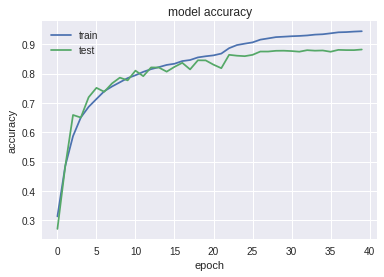

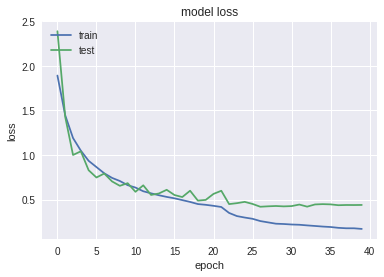

In [85]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()